### Importar bibliotecas

In [436]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

### Ler train e test

In [437]:
train = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

### transformar definir o Id do Passageiro como Index

In [438]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [439]:
train.set_index("PassengerId", inplace = True)

In [440]:
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [441]:
teste.set_index("PassengerId", inplace = True)

### Verificar shape dos dois

In [442]:
train.shape , teste.shape

((891, 11), (418, 10))

### Concatenar os dois dataframes

In [443]:
data = pd.concat([train,teste], sort = True)

In [444]:
data.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282


In [445]:
data.shape

(1309, 11)

### Traduzir Colunas

In [446]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [447]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

In [448]:
data.head(3)

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282


In [449]:
data.columns

Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaosConjuge', 'Sobreviveu', 'Bilhete'],
      dtype='object')

 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [450]:
Sexo = {"male":"homen","female":"mulher"}

In [451]:
Sexo

{'male': 'homen', 'female': 'mulher'}

In [452]:
data["Sexo"] = data["Sexo"].map(Sexo)

In [453]:
data.head(3)

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,homen,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282


 <a name="portembarque"></a>

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [455]:
#Embarque , Sexo , Sobreviveu 

 <a name="ord"></a>

* ### Ordinais

In [456]:
#Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [457]:
#Idade #Tarifa

 <a name="disc"></a>

* ### Discretos

In [458]:
#PaisFilhos #IrmaosConjuge

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [459]:
#Tem vairos números e letras , #Bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [460]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [461]:
moda_embarque = data["Embarque"].mode()[0]

In [462]:
data["Embarque"].fillna(moda_embarque, inplace = True)

In [463]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            0
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

### Informações Gerais (Parâmetros Numéricos)

In [464]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [465]:
data.describe(include=["object"])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homen,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

### Tamanho da Amostra

In [466]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [467]:
#2224 é o número total de passageiros que teinha 

In [468]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [469]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [470]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [471]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [472]:
data[["Classe","Sobreviveu"]].groupby(["Classe"]).mean().sort_values(by="Sobreviveu",ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [473]:
data[["Sexo","Sobreviveu"]].groupby(["Sexo"]).mean().sort_values(by="Sobreviveu",ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homen,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [474]:
data[["IrmaosConjuge","Sobreviveu"]].groupby(["IrmaosConjuge"]).mean().sort_values(by="Sobreviveu",ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [475]:
data[["PaisFilhos","Sobreviveu"]].groupby(["PaisFilhos"]).mean().sort_values(by="Sobreviveu",ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [476]:
data[["IrmaosConjuge","PaisFilhos"]].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

Text(0, 0.5, '')

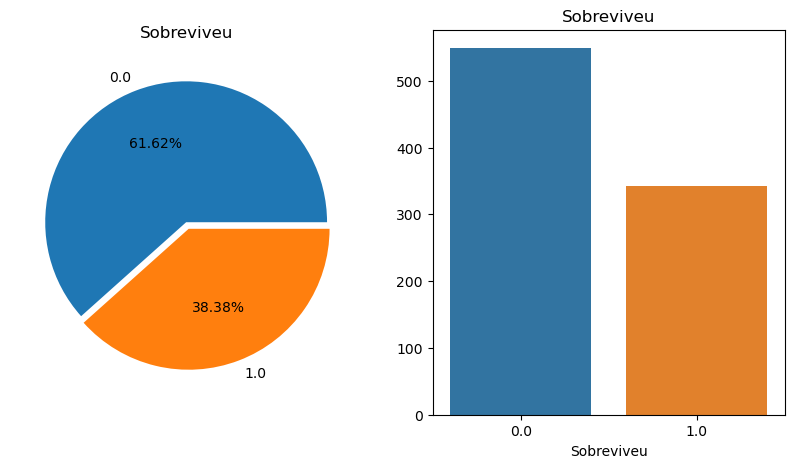

In [477]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu',data=data,ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

## Sobrevivência Por Sexo

In [478]:
data.groupby(["Sexo","Sobreviveu"])["Sobreviveu"].count()

#data[["PaisFilhos","Sobreviveu"]].groupby(["PaisFilhos"]).mean().sort_values(by="Sobreviveu",ascending=False)

Sexo    Sobreviveu
homen   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

<AxesSubplot:xlabel='Sexo', ylabel='count'>

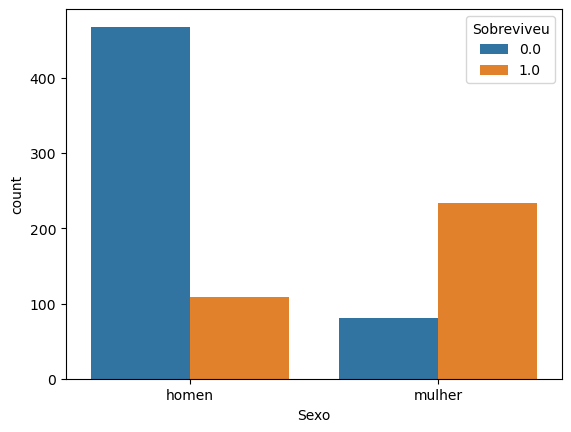

In [479]:
sns.countplot("Sexo",hue="Sobreviveu",data = data)

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

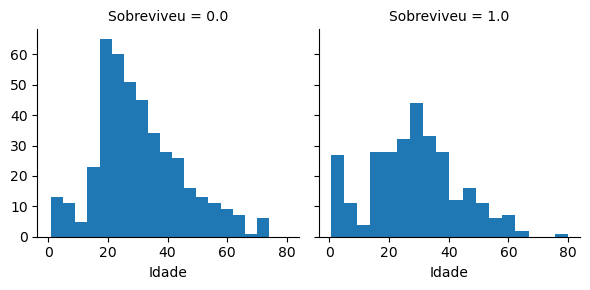

In [480]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

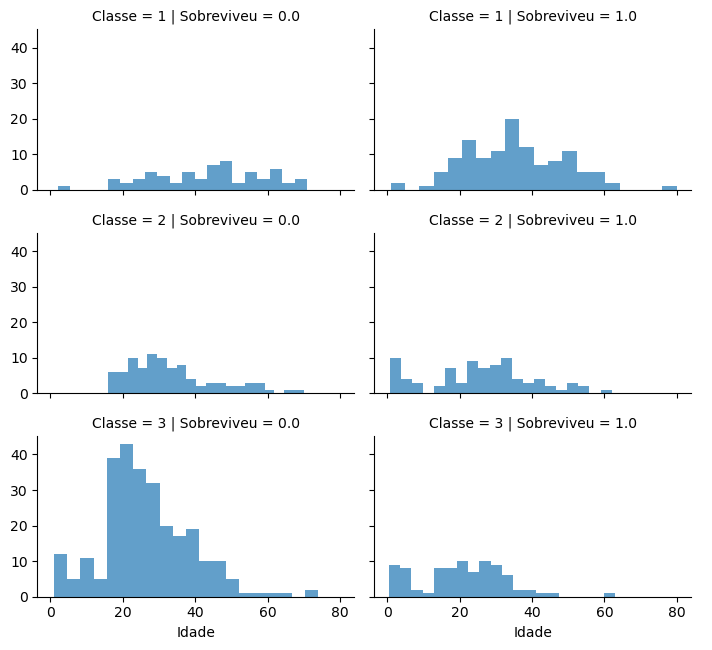

In [481]:
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
grid.add_legend();

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

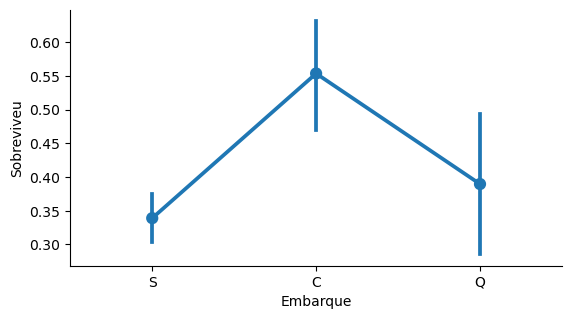

In [482]:
sns.catplot('Embarque','Sobreviveu',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

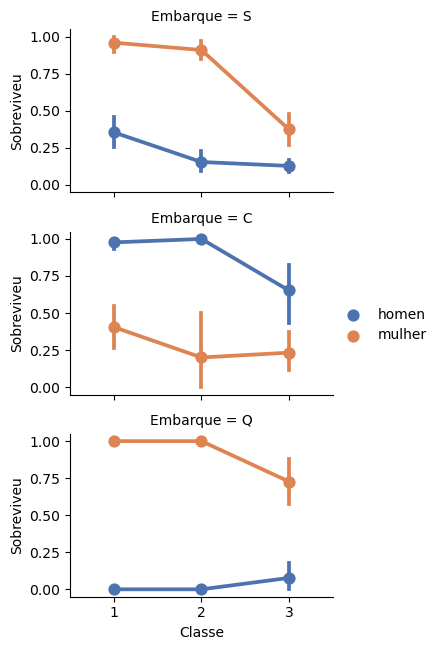

In [483]:
grid = sns.FacetGrid(data, row='Embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

### Agrupar mulheres por sobrevivência

In [484]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [485]:
data.loc[data['Sexo']=='homen'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

<AxesSubplot:xlabel='Sexo', ylabel='Tarifa'>

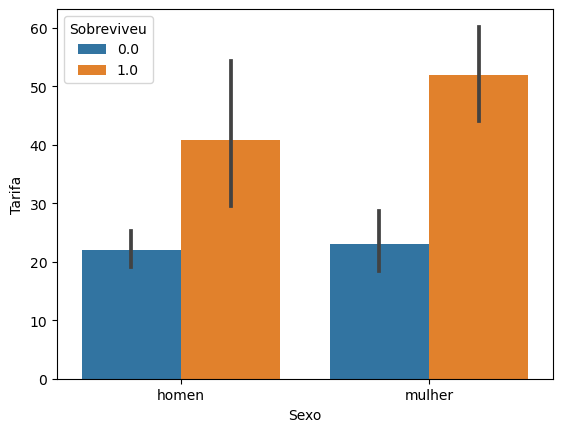

In [486]:
sns.barplot('Sexo','Tarifa',hue='Sobreviveu',data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

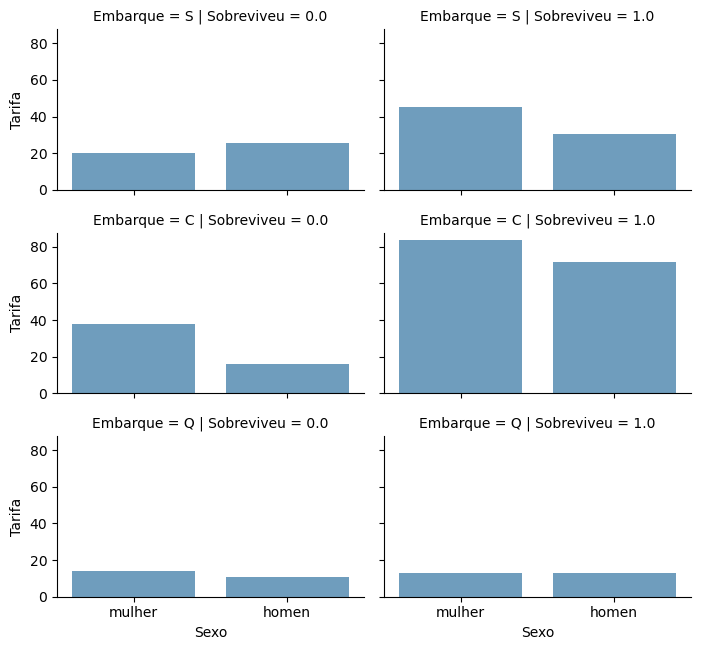

In [487]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [488]:
pd.crosstab(data['Sobreviveu'],data['Classe'],margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

<AxesSubplot:ylabel='PassengerId'>

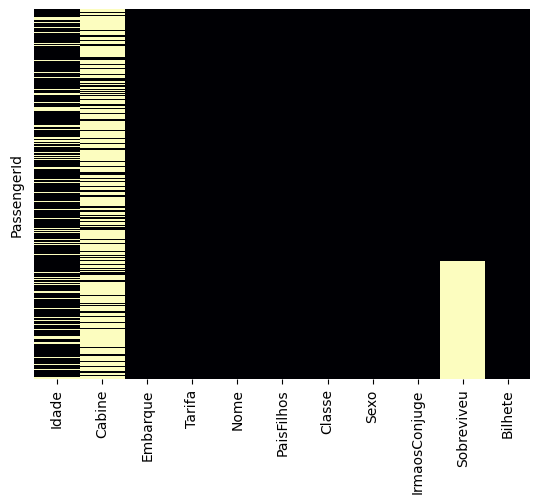

In [489]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='magma')

### Remover Cabine

In [490]:
data.drop(["Cabine"],axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

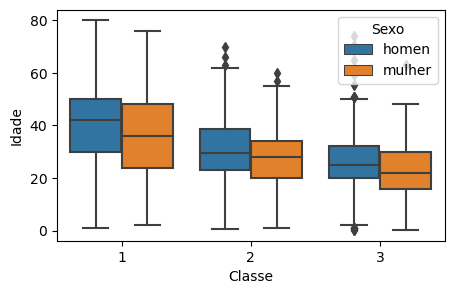

In [491]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [492]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [493]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [494]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homen,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [495]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [496]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homen,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [497]:
data.loc[data['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmaosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

In [498]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [499]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [500]:
data["Nome"]


PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

In [501]:
data["Sobrenome"] = data["Nome"].str.split(',').str[0]

### Criar Feature Sobrenome da Família

In [502]:
data.groupby(["Sobrenome"])["Nome"].count().sort_values(ascending = False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

### Verificar as maiores famílias

In [503]:
data.columns

Index(['Idade', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete', 'Titulo', 'Sobrenome'],
      dtype='object')

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [504]:
data[["Sobreviveu","Titulo","Sobrenome","Bilhete"]].loc[data["Sobrenome"] == "Andersson"]\
.loc[(data["Titulo"] != "HomemAdulto")]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


### Mulheres e Crianças da Família "Sage"

In [505]:
data[["Sobreviveu","Titulo","Sobrenome","Bilhete"]].loc[data["Sobrenome"] == "Sage"]\
.loc[(data["Titulo"] != "HomemAdulto")]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [506]:
data[["Sobreviveu","Titulo","Sobrenome","Bilhete"]].loc[data["Sobrenome"] == "Brown"]\
.loc[(data["Titulo"] != "HomemAdulto")]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [507]:
MulherOuCrianca = data.loc[data["Titulo"] != "HomemAdulto"]

In [508]:
MulherOuCrianca["Titulo"].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [509]:
MulherOuCrianca.loc[MulherouCrianca["Sobrenome"] == "Brown"]["Sobreviveu"].count()

3

In [510]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

### Sobrevivência Família "Andersson"

In [511]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
542,7,Andersson,Solteira,0.0
1212,7,Andersson,HomemAdulto,NaN
851,7,Andersson,Menino,0.0
611,7,Andersson,Casada,0.0
69,7,Andersson,Solteira,1.0
120,7,Andersson,Solteira,0.0
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
1106,7,Andersson,Solteira,NaN


In [512]:
for idx,_ in data.iterrows ():
    if data["Titulo"].at[idx] == "HomemAdulto":
        data["TamanhoGrupo"].at[idx] = 0

In [513]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
120,7,Andersson,Solteira,0.0
611,7,Andersson,Casada,0.0
851,7,Andersson,Menino,0.0
814,7,Andersson,Solteira,0.0
1106,7,Andersson,Solteira,NaN
543,7,Andersson,Solteira,0.0
542,7,Andersson,Solteira,0.0
69,7,Andersson,Solteira,1.0
643,5,Skoog,Solteira,0.0


### Criar Recurso "SobrevivenciaGrupo"

In [514]:
data[["Titulo","Sobreviveu"]].loc[data["Sobrenome"] == "Andersson"]\
.loc[data["Titulo"] != "HomemAdulto" ].mean()["Sobreviveu"]


0.14285714285714285

In [515]:
data['SobrevivenciaGrupo'] = data["Sobrenome"].apply(lambda x: data[["Titulo","Sobreviveu"]].loc[data["Sobrenome"] == x]\
.loc[data["Titulo"] != "HomemAdulto" ].mean()["Sobreviveu"])

In [516]:
data[['SobrevivenciaGrupo',"Titulo"]]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


In [517]:
for idx,_ in data.iterrows ():
    if data["Titulo"].at[idx] == "HomemAdulto":
        data["SobrevivenciaGrupo"].at[idx] = 0

In [518]:
data[['SobrevivenciaGrupo',"Titulo"]]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


In [519]:
data["SobrevivenciaGrupo"].isnull().sum()

105

In [520]:
data["SobrevivenciaGrupo"].fillna(0, inplace = True)

In [521]:
data["SobrevivenciaGrupo"].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [522]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] == 0) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [523]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] == 0) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].count()

58

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [524]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] == 1) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'West',
       'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter', 'Goldsmith',
       'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer', 'Murphy',
       'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays', 'Ryerson',
       'Wick', 'Hippach', 'Frauenthal', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [525]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] == 1) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].count()

90

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [526]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] > 0) & (data["SobrevivenciaGrupo"] < 1) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].unique()

array(['Asplund', 'Harper', 'Andersson', 'Allison', 'Minahan', 'Carter',
       'Crosby'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [527]:
data[["Sobrenome","Titulo",]].loc[(data["SobrevivenciaGrupo"] > 0) & (data["SobrevivenciaGrupo"] < 1) & (data["TamanhoGrupo"] > 1)]\
.loc[(data["Titulo"] != "HomemAdulto") & (data["Titulo"] != "Outros")]["Sobrenome"].count()

27

### Criar Recurso ExpecativaDeVida

In [528]:
data["ExpectativaDeVida"] = ""

for idx,_ in data.iterrows():
    if (data["SobrevivenciaGrupo"].at[idx] == 0) & (data["TamanhoGrupo"].at[idx] > 1):
        data["ExpectativaDeVida"].at[idx] = "morrer"
    elif (data["SobrevivenciaGrupo"].at[idx] == 1) & (data["TamanhoGrupo"].at[idx] > 1):
        data["ExpectativaDeVida"].at[idx] = "viver"
    else:
        data["ExpectativaDeVida"].at[idx] = "desconhecida"


In [529]:
pd.crosstab(data["ExpectativaDeVida"],data["Sobreviveu"])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,499,266
morrer,50,0
viver,0,76


<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

In [530]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [531]:
data.drop(["Nome","Bilhete","Sobrenome"],axis = 1,inplace = True)

# Variáveis Dummy

<br>

[início](#topo)

In [532]:
data = pd.get_dummies(data, columns = ["Classe", "Embarque","Titulo","ExpectativaDeVida","Sexo"], drop_first = True)

In [533]:
data.shape

(1309, 18)

In [534]:
data.head(3)

,Idade,Tarifa,PaisFilhos,IrmaosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0
2,38.0,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1
3,26.0,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1


# Usar Predição da Idade

<br>

[início](#topo)

In [535]:
data.drop("Idade", axis = 1, inplace = True )

In [536]:
idade = pd.read_csv("idade_completa.csv")

In [537]:
idade.set_index("IdPassageiro", inplace = True)

In [538]:
data = pd.concat([data,idade], axis = 1)

In [539]:
data.shape

(1309, 18)

In [540]:
data.head(3)

,Tarifa,PaisFilhos,IrmaosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,Idade
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.0
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.0
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.0


## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

In [541]:
data.isnull().sum()

Tarifa                        1
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

In [542]:
tarifa_media = data["Tarifa"].mean()

In [543]:
data["Tarifa"].fillna(tarifa_media, inplace = True)

<a name="faixaetaria"></a>

## Atualizar train e test 

In [544]:
train.shape

(891, 11)

In [545]:
train = data.loc[train.index]

In [546]:
train.shape

(891, 18)

In [547]:
test = data.loc[teste.index]

In [548]:
test.shape

(418, 18)

In [549]:
test.drop("Sobreviveu", axis =  1 , inplace = True)

In [550]:
test.shape

(418, 17)

In [551]:
train.head(5)

,Tarifa,PaisFilhos,IrmaosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,Idade
PassengerId,,,,,,,,,,,,,,,,,,
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.0
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.0
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.0
4,53.1000,0,1,1.0,1,1.0,0,0,0,1,0,0,0,0,0,0,1,35.0
5,8.0500,0,0,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,35.0


## Utilizar train para treinar o modelo

In [555]:
X = train.drop("Sobreviveu", axis = 1 )

In [554]:
y = train["Sobreviveu"]

In [556]:
X.shape,y.shape

((891, 17), (891,))

### Escolher colunas

In [557]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade'],
      dtype='object')

In [559]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade']

In [560]:
X = X[recursos]

### Averiguando Shapes 

In [561]:
X.shape,y.shape

((891, 17), (891,))

### Importar train_test_split para dividir e preparar para treino

In [563]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [ ]:
#train_test_split

In [569]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [564]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [565]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [566]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [567]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [570]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    # treinar o modelo
    x.fit(X_train, y_train)
    
    # gerar predicao
    x_pred = x.predict(X_test)
    
    # gerar score
    acuracidade = round(x.score(X_test,y_test)*100,2)
    
    resultados.append({'nome': model['nome'],
                       'score': acuracidade,
                       'pred': x_pred })

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

In [571]:
models = pd.DataFrame(resultados)

In [572]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
2,gradboost,92.16
0,logreg,90.67
8,LinearSVC,90.67
3,adaboost,89.93
11,RForest,87.69
1,etree,86.94
6,GaussianNB,85.45
10,Dtree,84.33
9,SGD,79.48
5,KNN,76.12


<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [601]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [602]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [603]:
resultado = cross_val_score(ada, X_train, y_train, cv=10, scoring='accuracy')

print('O score cross-validado do AdaBoost é:', resultado.mean())

O score cross-validado do AdaBoost é: 0.8876600102406554


In [604]:
resultado

array([0.9047619 , 0.87301587, 0.87301587, 0.85483871, 0.88709677,
       0.85483871, 0.90322581, 0.9516129 , 0.85483871, 0.91935484])

In [605]:
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [606]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

In [607]:
from sklearn.metrics import confusion_matrix

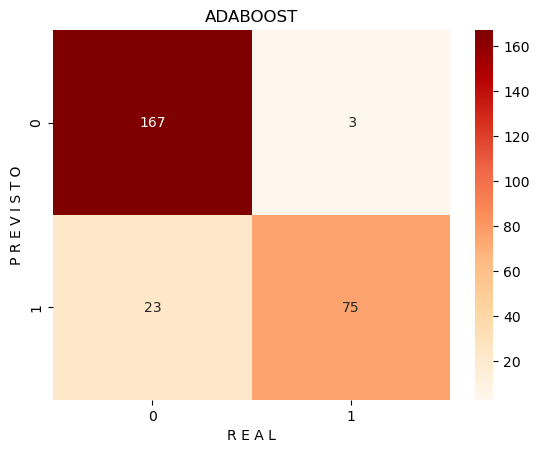

In [608]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('ADABOOST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [610]:
from sklearn.metrics import (recall_score,accuracy_score,precision_score,f1_score)

### Revocação

In [611]:
recall_score(y_test,ada_pred)

0.7653061224489796

### Acuracidade

In [612]:
accuracy_score(y_test,ada_pred)

0.9029850746268657

### Precisão

In [613]:
precision_score(y_test,ada_pred)

0.9615384615384616

### F1-Score

In [614]:
f1_score(y_test,ada_pred)

0.8522727272727273

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

In [616]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC=0.500
AdaBoost: ROC AUC=0.942


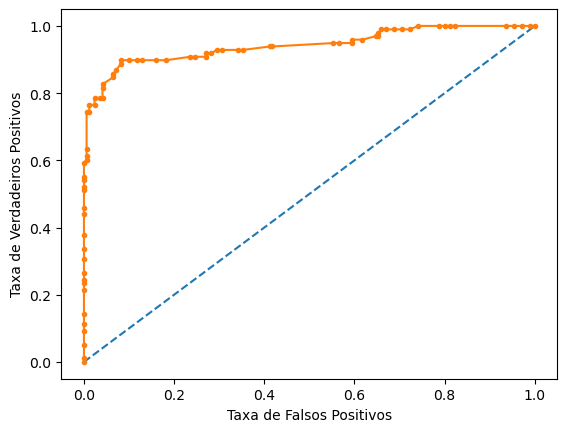

In [617]:
ns_probs = [0 for _ in range(len(y_test))] # no skill

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

ada_auc = roc_auc_score(y_test, ada_probs)

print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('AdaBoost: ROC AUC=%.3f' %(ada_auc))

# calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='AdaBoost')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

plt.show()

## Selecionando Threshold (Limite)

In [620]:
pred_proba = ada_probs >= 0.5

In [619]:
pred_proba = pd.Series(pred_proba).map({False: 0, True: 1}).values
pred_proba

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

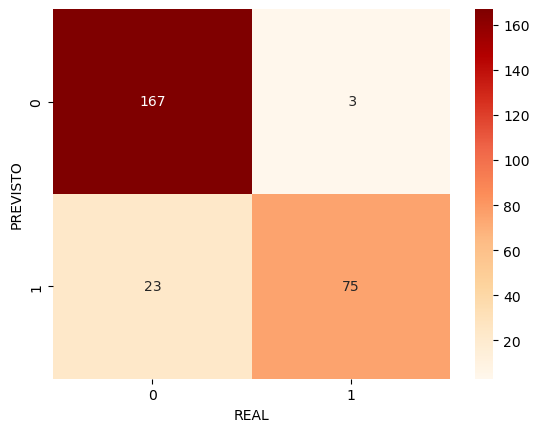

In [624]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap = "OrRd", annot=True, fmt = "2.0f")
plt.ylabel("PREVISTO")
plt.xlabel("REAL")
plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [625]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

In [626]:
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                 param_grid=rf_params, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8957161290322582
RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=123)


In [627]:
gd_pred = gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

In [628]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [629]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train,y_train)

print('Score', meu_ensemble.score(X_test, y_test))
cross = cross_val_score(meu_ensemble,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.8992537313432836
Score cross-validado 0.8920227920227921


In [630]:
cross.mean()

0.8920227920227921

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [631]:
from sklearn.ensemble import BaggingClassifier

In [632]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                       random_state=123, n_estimators=100)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Score', knn.score(X_test, y_test))
cross = cross_val_score(knn,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.753731343283582
Score cross-validado 0.7199430199430199


* #### Ensacamento DecisionTree


In [634]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.8917910447761194
Score cross-validado 0.8883190883190883


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

In [ ]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)
grad.fit(X_train, y_train)
grad_pred = dtree.predict(X_test)
print('Score', grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

* ### Configurando Hyper-Parâmetros para o AdaBoost

In [635]:
n_estimator = [100, 200] 
learn_rate = [0.05,0.1,0.3]
hyper={'n_estimators': n_estimator, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8957032258064517
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


In [637]:
adaboost_pred = gd.predict(X_test)

In [638]:
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

In [639]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [640]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [641]:
rf_features = rf.feature_importances(X_train,y_train)

In [642]:
rf_features

array([2.74733629e-02, 4.02463987e-03, 5.24172462e-03, 1.66787568e-01,
       3.25152238e-01, 1.54574654e-03, 2.53121101e-02, 1.52915466e-04,
       6.71114896e-03, 1.67483048e-01, 1.99635679e-03, 2.08265011e-05,
       4.22994815e-02, 2.89616439e-02, 7.66908962e-02, 1.13161243e-01,
       6.98504956e-03])

In [643]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade'], dtype=object)

In [644]:
feature_dataframe = pd.DataFrame({'recursos': cols, 
                                  'Importância de Recursos RForest': rf_features})

<AxesSubplot:ylabel='recursos'>

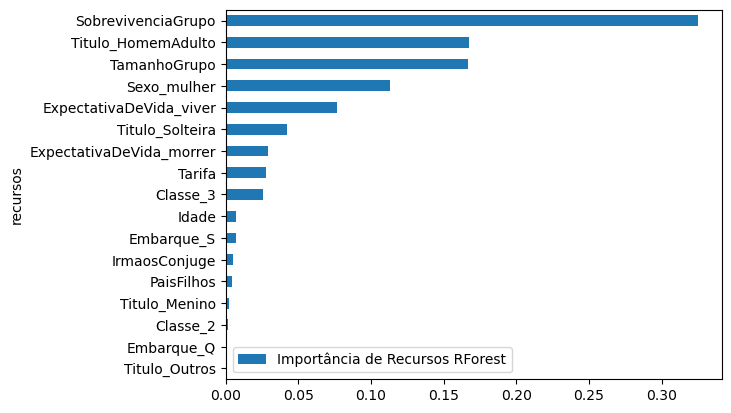

In [645]:
feature_dataframe.sort_values(by='Importância de Recursos RForest').plot.barh(x='recursos')

In [648]:
meu_ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [649]:
meu_ensemble.score(X_test, y_test)

0.8992537313432836

In [650]:
test[recursos].shape

(418, 17)

In [651]:
X_test.shape

(268, 17)

In [652]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [653]:
ensemble_pred.shape

(418,)

In [654]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)

In [655]:
submissao = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': ensemble_pred
})

In [656]:
submissao.shape

(418, 2)

In [657]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [659]:
submissao.to_csv('Ezequiel_ensemble.csv', index=False)